# INTRODUCTION 

On this project we created a regresssion algorithm that predicts how much kilogram of Golden Delicious Aplles will cost,
Challenged by [**EXPLORE Data Science Academy**](https://explore-datascience.net/). The data used here is from Durban Fresh Produce Market but can be obtained [here](https://www.kaggle.com/c/edsa-apple-prices-challenge/data).

In this notebook we predicted the Target numeric variable which is Avarage Price using the predictors (Stock on hand, High Price, Low Price, Total Qty Sold, etc). below is the work flow
1. Exploratory data analysis, Data cleaning and formatting
2. Feature engineering and variable selection
3. Build the model using selected features
4. Evaluate the best model on testing set

___________________________________________________________________________________________________________________________

Firstly we imported the needed libraries and data.

## 1. Importing Libraries

In [163]:
import numpy as np
import pandas as pd
from datetime import datetime
from scipy import stats

# Visualisations
#import missingno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Regression models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor, FeaturesData, Pool

# Model slection
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


# Other
from scipy import stats
import math
import pickle

Data was downloaded from the given link above

In [4]:
#Import Data
train_df = pd.read_csv('df-train_set.csv')
test_df = pd.read_csv('df-test_set.csv')

test_ID = test_df['Index']
test_df = test_df.drop('Index', axis=1)

# Exploratory Data Analysis (EDA)

We will only use dataset that falls under APPLE GOLDEN DELICIOUS Commodities

In [5]:
train_df = train_df[(train_df['Commodities'] == 'APPLE GOLDEN DELICIOUS')] #create new df focusing on 'APPLE GOLDEN DELICIOUS

In [6]:
train_df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [7]:
test_df.head() #Check the test set

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [8]:
print('We have {} training rows and {} trianing columns.'.format(train_df.shape[0], train_df.shape[1]))

We have 1952 training rows and 13 trianing columns.


From the above dataframe we can't tell which columns has null values, so we will use the Pandas library (info) to help check how many null values, the datatype and the columns name for those dataframe

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
Province            1952 non-null object
Container           1952 non-null object
Size_Grade          1952 non-null object
Weight_Kg           1952 non-null float64
Commodities         1952 non-null object
Date                1952 non-null object
Low_Price           1952 non-null float64
High_Price          1952 non-null float64
Sales_Total         1952 non-null float64
Total_Qty_Sold      1952 non-null int64
Total_Kg_Sold       1952 non-null float64
Stock_On_Hand       1952 non-null int64
avg_price_per_kg    1952 non-null float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB


We will check the shape of our data

In [11]:
train_df.shape, test_df.shape

((1952, 13), (685, 12))

Table for summary statistics for our data (Mean, min, Max, Std, count, etc)

In [12]:
# Exploring the spread of numeric variables within the dataset
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight_Kg,1952.0,40.460912,99.655169,3.00,9.00,12.00,18.300,400.00
Low_Price,1952.0,174.307377,373.553578,2.00,50.00,80.00,127.250,2300.00
High_Price,1952.0,215.648053,433.546159,5.00,60.00,108.00,160.000,3300.00
Sales_Total,1952.0,20053.533811,39005.069445,5.00,1325.00,5495.00,21082.500,369464.00
Total_Qty_Sold,1952.0,174.510758,308.810797,1.00,12.00,64.00,200.000,4237.00
Total_Kg_Sold,1952.0,2960.176332,6097.416527,3.00,219.60,853.50,3093.525,74000.00
Stock_On_Hand,1952.0,408.393955,724.450582,0.00,9.00,126.50,468.000,6400.00
avg_price_per_kg,1952.0,6.778893,2.248744,0.25,5.46,6.67,8.280,21.24


## 1 Future Selection 

Feature selection will help us choose the most relevant variable, in this project we have used Correlection to help use select features that are highly correleted to the target variable(have a relationship with the target), help with removing variables looking at their relationship with the target.
But before we do that we check the distribution of our target variable.

We will look at the distribution of our target variable which is the Avarage Price Per KG

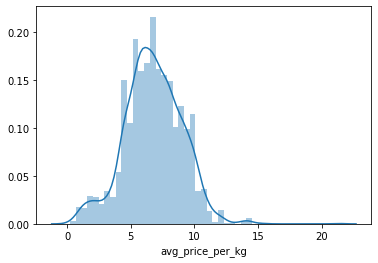

In [13]:
# target variable distribution
sns.distplot(train_df['avg_price_per_kg'],kde=True)

Our target variable is symmetrical distributed 

_______________________________________________________________________________________________________________

In [14]:
# Looking at the skewnwss or symmetry of our dataest
train_df.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

Secondly we will check for outliers

In [15]:
# Checking for outliers in our dataset.
train_df.kurtosis() #method for checking outliers

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

The Kurtosis method help us determine the outliers, any value higher than 3 is an outlier, all our above numeric independent variables have large number of outliers

________________________________________________________________________________________________________________________

### Outliers Treatment

Firstly we checked for outliers in our numeric training dataset., we used graphs to help us detect outliers, then we used the z-score method to remove outliers.
The outliers influence the shapeor the slope of the line, the treatment of outliers is very important and ahould be done.


We used Histogram to check for outliers

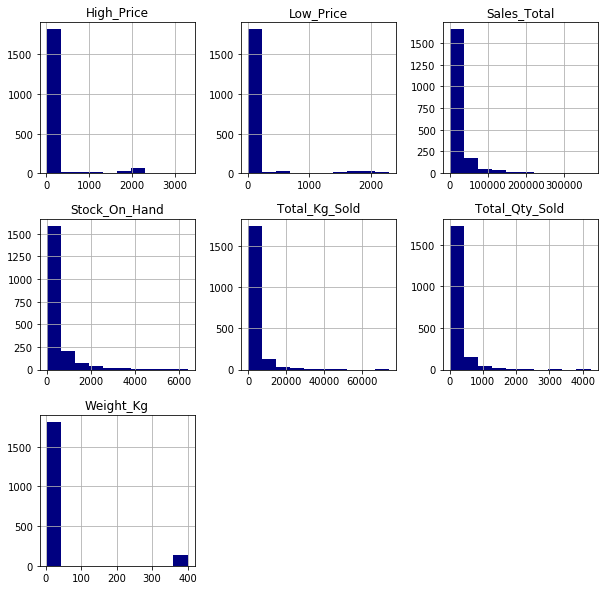

In [26]:
df = ['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand'] #list of numeric variables
train_df[df].hist(figsize=(10,10), color = 'navy'); #assign the list to the dataframe and plot a histogram with 10,10 figure size

From the above graphs you can see that all our plotted figures has outliers, beside the plots, we also saw with Kurtosis method above that we have too much outliers in our numeric dataset.

--------------------------------------------------------------------

Here we will use the Z-score method to remove outliers from our dataset.

In [19]:
#calculate z
threshold = 3 #used the threshold of 3
lowPrice_z = np.abs(stats.zscore(train_df.Low_Price))
lowPrice_abs_z_scores = np.abs(lowPrice_z)
df1 = train_df[lowPrice_abs_z_scores < threshold]

highPrice_z = np.abs(stats.zscore(df1.High_Price))
highPrice_abs_z_scores = np.abs(highPrice_z)                                
df2 = df1[highPrice_abs_z_scores < threshold]

weight_z = np.abs(stats.zscore(df2.Weight_Kg))
weight_abs_z_scores = np.abs(weight_z) 
df3 = df2[weight_abs_z_scores < threshold]

salesTotal_z = np.abs(stats.zscore(df3.Sales_Total))
salesTotal_abs_z_scores = np.abs(salesTotal_z) 
df4 = df3[salesTotal_abs_z_scores < threshold]

totalQtySold_z = np.abs(stats.zscore(df4.Total_Qty_Sold))
totalQtySold_abs_z_scores = np.abs(totalQtySold_z) 
df5 = df4[totalQtySold_abs_z_scores < threshold]

totalKgSold_z = np.abs(stats.zscore(df5.Total_Kg_Sold))
totalKgSold_abs_z_scores = np.abs(totalKgSold_z)
df6 = df5[totalKgSold_abs_z_scores < threshold]

stockOnHand_z = np.abs(stats.zscore(df6.Stock_On_Hand))
stockOnHand_abs_z_scores = np.abs(stockOnHand_z)
df7 = df6[stockOnHand_abs_z_scores < threshold]

avgPricePerKg_z = np.abs(stats.zscore(df7.avg_price_per_kg))
avgPricePerKg_abs_z_scores = np.abs(avgPricePerKg_z)
trainData_df = df7[avgPricePerKg_abs_z_scores < threshold]

____________________________________________________________________________________________________________________________

Now that we have removed outliers we used scatter plots to check for obvious relationships with the target variable, we check for linearity between the predictor variable and the target variable. The scatter plot that shows no linear relationship betwen the predictor variable and the target variable will be of no use as the model will be unappropiate.

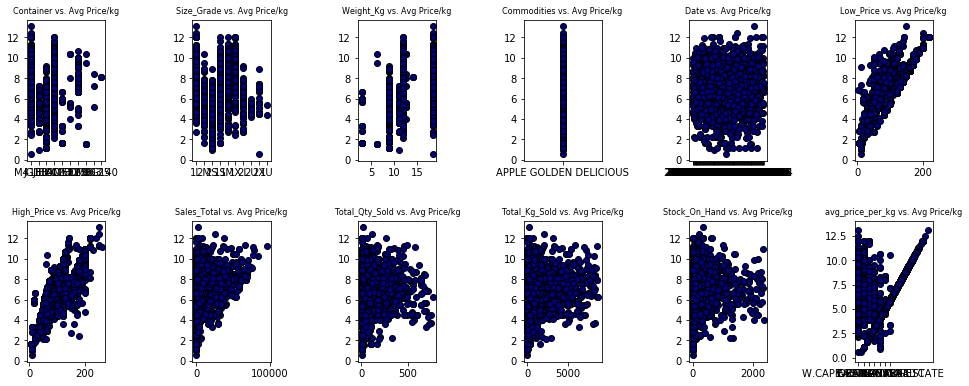

In [27]:
fig, ax = plt.subplots(2,6, figsize=(14,6),)#plot fig
fig.subplots_adjust(hspace = 0.5, wspace=.2) #plot weight and height space
ax = ax.ravel()

for i, column in enumerate(trainData_df.columns): #looping over the columns of traindata_df dataset
    ax[i-1].set_title("{} vs. Avg Price/kg".format(column),fontsize=8) #set title
    ax[i-1].scatter(x=trainData_df[column],y=trainData_df['avg_price_per_kg'],color='navy',edgecolor='k') #plot type & variables

fig.tight_layout(pad=3)

From the above scatter plot figures, we can conclude that Commodities has no relationship with the target variable, so we will remove it from our dataset. But atleast half of our plots shows a bit of relationship that we will explore further.

In [31]:
trainData_df.shape, test_df.shape

((1643, 12), (685, 12))

## 2 Dummy Variables

### Preprocessing

In [39]:
#For The TRAIN DATA (Train_df)
train_df_d = pd.get_dummies(trainData_df) #dummy variable

train_df_d.columns = [col.replace(" ","_") for col in train_df_d.columns] #replacing space with -
#train_df_d.drop(['Commodities_APPLE_GOLDEN_DELICIOUS'], axis= 1, inplace =True) #removing Commodities

train_df_d.head() 

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_CAPE,Province_EASTERN_CAPE,...,Date_2020-09-07,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,1,0,...,0,1,0,0,0,0,0,0,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,1,0,...,0,0,0,0,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,0,0,...,0,0,0,0,0,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,1,0,...,0,0,0,0,0,0,0,0,0,0
80,9.0,55.0,55.0,4840.0,88,792.0,181,6.11,1,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#For The Test DATA (Test_df)
#using the test data
test_df = test_df[(test_df['Commodities'] == 'APPLE GOLDEN DELICIOUS')]

X_t = pd.get_dummies(test_df)
X_t.columns = [col.replace(" ","_") for col in X_t.columns]
X_t.drop(['Commodities_APPLE_GOLDEN_DELICIOUS'], axis= 1, inplace =True)

X_t.head()



,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_CAPE,Province_EASTERN_CAPE,Province_NATAL,...,Date_2020-09-03,Date_2020-09-07,Date_2020-09-09,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
0,12.0,128.0,136.0,5008.0,38,456.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18.3,220.0,220.0,1760.0,8,146.4,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.0,120.0,120.0,720.0,6,72.0,45,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18.3,160.0,160.0,160.0,1,18.3,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18.3,140.0,160.0,14140.0,100,1830.0,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
train_df_d.shape, X_t.shape

((1643, 182), (685, 179))

# 2.3 Correlation and Variable selection

1. Check the independent variables that are highly correleted to the target variable
2. Check those that have moderate correlection
3. Check the weak correlected independent variables
4. Chose variables to remove depending on their relationship with the target variable

we will arrange the data so our target variable be the last column on the dataframe

In [42]:
#Avarage must be the last column (dependent)
#reorder columns
column_titles = [col for col in train_df_d.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
train_df_d=train_df_d.reindex(columns=column_titles)

The correlection

In [43]:
# Target correlations with features
corrs = pd.DataFrame(train_df_d.corr()['avg_price_per_kg']).rename(columns = {'avg_price_per_kg':'Correlation'})
corrs.sort_values(by='Correlation',ascending=False, inplace=True)
corrs

,Correlation
avg_price_per_kg,1.000000
Low_Price,0.818317
High_Price,0.765937
Weight_Kg,0.492557
Container_M4183,0.380769
...,...
Size_Grade_2M,-0.187072
Province_EASTERN_CAPE,-0.229628
Province_NATAL,-0.337509
Size_Grade_2S,-0.409072


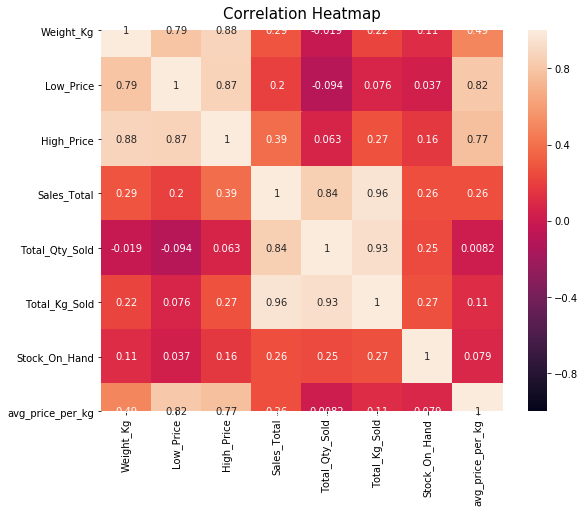

In [47]:
plt.figure(figsize=(9, 7))
heatmap = sns.heatmap(trainData_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12);

In [134]:
df_num_corr = train_df.corr()['avg_price_per_kg'][:-1] # -1 because the latest row is Average price per kg
golden_features_list = df_num_corr[abs(df_num_corr) > 0.01].sort_values(ascending=False)
print("There is {} strongly correlated values with Average price per kg:\n{}".format(len(golden_features_list), golden_features_list))

There is 6 strongly correlated values with Average price per kg:
Sales_Total       0.108473
Stock_On_Hand     0.105028
Total_Qty_Sold    0.087536
Low_Price        -0.141740
High_Price       -0.164496
Weight_Kg        -0.337886
Name: avg_price_per_kg, dtype: float64


### Train & Test Split

For Train Data (Train_df thats in df_dummies)

In [138]:
#spliting variables into x and y
X = train_df_d[['Sales_Total', 'Low_Price', 'High_Price','Stock_On_Hand','Weight_Kg']].values
Y = train_df_d['avg_price_per_kg']



For Test Data (Test_df thats in X_t dummies)

In [139]:
X_real = X_t[['Sales_Total', 'Low_Price', 'High_Price', 'Stock_On_Hand','Weight_Kg']].values

In [141]:
X_real.shape, X.shape #checking the data shape

((685, 5), (1643, 5))

In [142]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

### MODELS

In [143]:
#Function for model prediction
def model_test(model, X, y):
    #Predict
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y_pred, y))
    print('R2 Score is : {} | Root Mean Square Error is : {}'
          .format(r2,rmse))
    
    return

#### Using The Linear Regression (Train and Test)

In [146]:
#Function for Linear Regression
def linearRegression(X, y):
    global Linear_model
    Linear_model = LinearRegression(n_jobs = -1)
    Linear_model.fit(X, y)
    return Linear_model
#fitting the model
linearRegression(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [147]:
#making predictions
model_test(Linear_model, X_train, y_train)
model_test(Linear_model, X_test, y_test)

R2 Score is : 0.8530650498978803 | Root Mean Square Error is : 0.8073784101739777
R2 Score is : 0.8604839429823115 | Root Mean Square Error is : 0.793508656348998


Prediction on the test dataset

In [149]:
test_linear = Linear_model.predict(X_real)
test_linear

array([   9.91418042,   13.14006595,    9.05534656,    8.96261034,
          8.34094418,  -53.9744877 ,    3.94823738,    7.40407506,
          8.39365804,    9.66582559,    5.57542552,   -9.28428651,
          8.30876415,    4.85878666,    5.25867021,    5.89463552,
          7.43448841,    5.22364246,   13.38856362,    5.98296289,
          5.76523087,  -43.84481683,    5.74706305,    6.94397094,
          5.54963078,    5.85905382,    7.87275572,    8.35282817,
          7.26051151,    8.45761592,    8.29863718,    5.72883605,
         10.4121409 ,    7.58700174,  -83.5458118 ,   10.35493847,
         11.77797078,   13.6816046 ,    6.07482798,    6.68571588,
          9.10588903,    6.50575383,    4.09709791,    6.07988463,
          5.54642571,    5.58487864,  -37.0542529 ,    5.5695208 ,
          5.91755358,  -87.18118819, -140.99940487,    6.09223497,
          5.90500281,   15.92671099,    8.38961766,    5.56831922,
         10.72408118,    9.62804467,    7.74943173,    5.71591

_____________________________________________________________________________________________________________________________

#### Using The Lasso Regression

In [151]:
#fitting the data using Lasso
def lasso_Regression(X, y):
    global Lasso_model
    Lasso_model = Lasso(alpha=0.01, random_state=42)
    Lasso_model.fit(X, y)
    return Lasso_model

lasso_Regression(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

In [152]:
model_test(Lasso_model, X_train, y_train)
model_test(Lasso_model, X_test, y_test)

R2 Score is : 0.8530581105458541 | Root Mean Square Error is : 0.8073974751304576
R2 Score is : 0.8604028348766128 | Root Mean Square Error is : 0.7937392772326975


Prediction on test set

In [153]:
test_lasso = Lasso_model.predict(X_real)
test_lasso

array([   9.9044746 ,   13.13055994,    9.04863615,    8.96558791,
          8.34497458,  -53.24922047,    3.95536778,    7.40897208,
          8.39462054,    9.66680193,    5.57310453,   -8.65383132,
          8.31059175,    4.86016777,    5.25867276,    5.89318988,
          7.43337616,    5.22325862,   13.37526435,    5.98119719,
          5.7628992 ,  -43.1075099 ,    5.74464733,    6.93908849,
          5.54909819,    5.8586581 ,    7.87716813,    8.35763035,
          7.26644294,    8.47604678,    8.30251401,    5.73045127,
         10.40975964,    7.59432814,  -82.79135837,   10.35376595,
         11.77301056,   13.66855976,    6.07622393,    6.69390904,
          9.09936862,    6.50969097,    4.11472762,    6.07720359,
          5.54601473,    5.5828402 ,  -36.33969083,    5.56897601,
          5.91612935,  -86.4649156 , -140.00471234,    6.08873111,
          5.91163596,   15.90892576,    8.38560226,    5.57712176,
         10.7123392 ,    9.62710558,    7.7524879 ,    5.71921

______________________________________________________________________________________________________________________________

#### Using Decision Tree

In [154]:
def decision_Tree(X,y):
    global dec_tree
    dec_tree = DecisionTreeRegressor(random_state=42)
    dec_tree.fit(X, y)
    return dec_tree

decision_Tree(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [155]:
model_test(dec_tree, X_train, y_train)
model_test(dec_tree, X_test, y_test)

R2 Score is : 1.0 | Root Mean Square Error is : 1.2522444642328787e-15
R2 Score is : 0.8745379432682919 | Root Mean Square Error is : 0.7524814067318897


Prediction on test set

In [156]:
test_decTree = dec_tree.predict(X_real)
test_decTree

array([10.68, 12.02, 10.  ,  8.74,  8.19, 11.12,  3.64,  7.24,  9.26,
        9.29,  6.17, 11.96,  9.02,  4.44,  4.55,  6.11,  8.  ,  4.57,
       10.89,  6.16,  5.34, 11.39,  5.23,  7.78,  5.56,  6.91,  7.86,
        8.07,  7.05,  7.37,  7.92,  5.57, 10.08,  7.65, 11.12,  9.84,
       10.93, 11.39,  6.36,  5.96,  6.04,  8.82,  4.92,  6.19,  5.56,
        5.61, 11.39,  5.56,  6.11, 11.39, 12.02,  6.42,  4.64, 11.96,
        8.16,  7.19, 12.  ,  9.13,  6.32,  6.  ,  7.24, 11.23,  6.19,
        9.58,  6.55,  6.19,  6.69,  4.51, 11.12,  7.1 ,  5.46,  4.46,
        2.9 ,  8.  ,  6.94,  4.02,  6.11,  9.26, 10.93,  6.24,  4.5 ,
       11.39,  5.9 ,  5.56,  1.11,  6.07,  6.82, 11.23,  4.55,  7.72,
        9.38,  9.4 ,  7.32,  6.27,  6.  ,  5.69,  8.21,  8.9 ,  6.91,
        5.56, 10.93,  6.42,  6.  ,  7.65,  6.64,  8.74,  6.83,  2.73,
       10.  , 11.39,  4.23,  7.82,  6.11,  4.24,  4.42, 10.  ,  5.33,
        9.36,  4.44,  6.62,  5.95,  4.17,  9.97, 11.39,  9.29,  7.25,
        4.32,  9.15,

______________________________________________________________________________________________________________________________

#### Using Random Forest 

In [157]:
def random_Forest(X,y):
    global rand_forest
    rand_forest = RandomForestRegressor(n_estimators=350, max_depth=450, random_state=3)
    rand_forest.fit(X, y)
    return dec_tree

random_Forest(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [158]:
model_test(rand_forest, X_train, y_train)
model_test(rand_forest, X_test, y_test)

R2 Score is : 0.9897969346690734 | Root Mean Square Error is : 0.21275506633929164
R2 Score is : 0.9537957866568972 | Root Mean Square Error is : 0.45664674062856375


Prediction on test set

In [159]:
test_randForest= rand_forest.predict(X_real)
test_randForest

array([10.67365714, 11.96045714, 10.00145714,  8.74177143,  8.44157143,
       11.35365714,  3.61828571,  7.247     ,  8.44434286,  9.30368571,
        5.38108571, 11.77725714,  8.79217143,  4.41448571,  4.61645714,
        6.10977143,  7.71328571,  4.54094286, 10.82742857,  6.01571429,
        5.38568571, 11.4266    ,  5.29365714,  7.92422857,  5.56114286,
        6.3924    ,  7.75548571,  7.99717143,  7.37742857,  7.351     ,
        8.00077143,  5.59548571, 10.01248571,  7.65      , 11.2954    ,
        9.83945714, 10.92877143, 11.50414286,  6.34848571,  6.16265714,
        8.06908571,  8.2012    ,  4.96048571,  6.199     ,  5.56      ,
        5.21277143, 11.46194286,  5.55731429,  6.11002857, 11.3514    ,
       11.79771429,  6.33657143,  6.22825714, 11.70571429,  8.33225714,
        5.74591429, 11.80802857,  9.02511429,  7.11208571,  5.96651429,
        7.81068571, 11.51505714,  6.19194286,  9.21934286,  6.1274    ,
        6.15828571,  6.80317143,  5.21948571, 11.33165714,  7.07

______________________________________________________________________________________________________________________________

.

Using AdaBoost and Catboost to combine models and evaluate results

In [160]:
# Instantiate Random forest regression model to use as the base model
d_tree = RandomForestRegressor(n_estimators=300, max_depth=100, random_state=3)
# Instantiate AdaBoostRegressor model with a decision tree as the base model
bst_reg = AdaBoostRegressor(base_estimator = d_tree, random_state= 10 )

In [161]:
#fitting
bst_reg.fit(X_train, y_train)
bst_reg.fit(X_test, y_test)
#predictions
model_test(bst_reg, X_train, y_train)
model_test(bst_reg, X_test, y_test)


R2 Score is : 0.8978262508188143 | Root Mean Square Error is : 0.6732622154863762
R2 Score is : 0.9959807074782725 | Root Mean Square Error is : 0.1346834955428158


In [162]:
#predictions on test set
test_ada = bst_reg.predict(X_real)
test_ada

In [167]:
#model 
model = CatBoostRegressor(iterations=100, learning_rate=1, depth=5)
# Fit model
model.fit( X_train, y_train)
model.fit( X_test, y_test)
#predictions
model_test(model, X_train, y_train)
model_test(model, X_test, y_test)


0:	learn: 1.1479784	total: 1.79ms	remaining: 178ms
1:	learn: 0.8604480	total: 3.54ms	remaining: 173ms
2:	learn: 0.7828713	total: 4.66ms	remaining: 151ms
3:	learn: 0.7236441	total: 5.8ms	remaining: 139ms
4:	learn: 0.6756399	total: 7.06ms	remaining: 134ms
5:	learn: 0.6306682	total: 8.15ms	remaining: 128ms
6:	learn: 0.6054520	total: 9.34ms	remaining: 124ms
7:	learn: 0.5817908	total: 10.5ms	remaining: 121ms
8:	learn: 0.5482421	total: 11.6ms	remaining: 118ms
9:	learn: 0.5289393	total: 13ms	remaining: 117ms
10:	learn: 0.5192660	total: 14.5ms	remaining: 117ms
11:	learn: 0.4999218	total: 15.6ms	remaining: 115ms
12:	learn: 0.4917594	total: 16.7ms	remaining: 112ms
13:	learn: 0.4756032	total: 18.1ms	remaining: 111ms
14:	learn: 0.4694069	total: 19.4ms	remaining: 110ms
15:	learn: 0.4496351	total: 20.4ms	remaining: 107ms
16:	learn: 0.4433149	total: 21.6ms	remaining: 106ms
17:	learn: 0.4387338	total: 22.8ms	remaining: 104ms
18:	learn: 0.4297900	total: 24.3ms	remaining: 104ms
19:	learn: 0.4207612	tota

In [173]:
#predictions on test data
cat_boost = model.predict(X_real)
cat_boost

array([10.19919333, 11.69787213,  9.87084376,  8.68059824,  8.25223785,
       11.72610837,  3.57280494,  8.21117318,  9.865548  ,  8.90283936,
        4.62933825, 11.92789453,  9.14661135,  4.60745965,  4.42011249,
        6.16977452,  7.24250904,  4.77760631, 10.51446164,  5.75588132,
        5.12630313, 11.09293466,  5.76811441,  7.73471867,  5.54255906,
        6.16280266,  8.57228406,  8.00395286,  8.39455074,  7.79901855,
        8.11968583,  5.67407663,  9.87771429,  7.38568115, 11.84333738,
        9.79391049, 10.79066659, 10.49831451,  6.59932759,  6.96647635,
        9.08282329,  8.72463352,  5.49662726,  6.36732468,  5.5662088 ,
        5.15083806, 10.42703684,  5.96920391,  5.44865792, 11.71360048,
       11.49823481,  6.22947519,  5.49138855, 12.20414386,  8.24612988,
        5.60034569,  8.83793139, 10.24985748,  8.11225883,  6.00771996,
        7.7514341 , 11.45886255,  6.60859498,  9.29732153,  5.97845338,
        6.13130959,  6.63371613,  4.22397078, 11.67146843,  6.89

.

FIGURES FOR MODELS

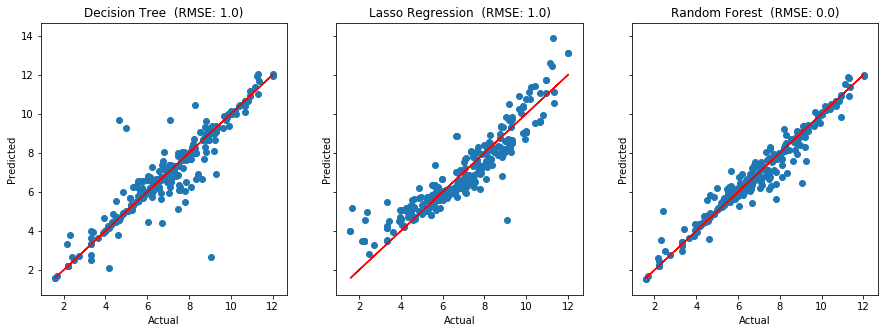

In [176]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
pred = [dec_tree.predict(X_test), Lasso_model.predict(X_test), rand_forest.predict(X_test)]
title = [ 'Decision Tree','Lasso Regression','Random Forest']

# Loop through all axes to plot each model's results 
for i in range(3):
    
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i])

In [174]:
# create submission dataframe
# Create Dataframe of Order_No and Time from Pickup to Arrival
submission = pd.DataFrame(
    {'Index': test_ID,
     'avg_price_per_kg': cat_boost
    })

submission.to_csv("Cat_B_Submissions.csv", index=False)